In [1]:
lambdaC=0.99 # Degradtion threshold of Corrective Maintenance  
lambdaQ=0.8  # Degradation threshold of Quality maintenance
lambdaPM=0.4 # Degradation threshold of Preventive Maintenance
mu=0.01      # reliability degradation rate
ProcTime=[ #(machine_id, process_time) 
         [ [(0,  8), (1, 18)], [(1, 16), (0, 13)], [(3, 12), (0, 18)] ],	#Job0
         [ [(0, 20)         ], [(2, 10)         ], [(1, 18), (0, 14)] ],	#Job1
         [ [(2, 12), (0, 17)], [(3,  8), (0, 18)], [(0, 15), (1, 17)] ],	#Job2
         [ [(3, 14), (0, 15)], [(1, 18), (0, 12)]                     ],	#Job3
         [ [(2, 10)         ], [(0, 15), (1, 19)]                     ]	      #Job4
      ]
PM_time=2
CM_time=5
LargVmax=sum([1  for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) if len(op)>1])
print('NM=',max([o[0] for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) for oid,o in enumerate(op)])+1)


ins1 =	[ #(machine_id, process_time) 
         [ [(1,  8)], [(2, 16)] , [(4, 12)] ],    #Job
         [ [(1, 20)], [(3, 10)] , [(2, 18)] ],    #Job2
         [ [(3, 12)], [(4,  8)] , [(1, 15)] ],    #Job3
         [ [(4, 14)], [(2, 18)]             ],    #Job4
         [ [(3, 10)], [(1, 15)]             ]#,    #Job5
       ]
for id,j in enumerate(ins1):
      for id1,op in enumerate(j):
            for id2,mo in enumerate(op):
                  ins1[id][id1][id2]=(mo[0]-1,mo[1])
# Job Set No. 1: 5 jobs 4 machines with Low flexibility (1-2)
ins2 =   [ #(machine_id, process_time) 
         [ [(1,  8), (2, 18)], [(2, 16), (1, 13)], [(4, 12), (1, 18)] ],	#Job1
         [ [(1, 20)         ], [(3, 10)         ], [(2, 18), (1, 14)] ],	#Job2
         [ [(3, 12), (1, 17)], [(4,  8), (1, 18)], [(1, 15), (2, 17)] ],	#Job3
         [ [(4, 14), (1, 15)], [(2, 18), (1, 12)]                     ],	#Job4
         [ [(3, 10)         ], [(1, 15), (2, 19)]                     ]	#Job5
      ]
for id,j in enumerate(ins2):
      for id1,op in enumerate(j):
            for id2,mo in enumerate(op):
                  ins2[id][id1][id2]=(mo[0]-1,mo[1])
# Job Set No. 1: 5 jobs 4 machines with medium flexibility (2-3)
ins3 =	[ #(machine_id, process_time) 
         [ [(1,  8), (2, 18), (3, 16)], [(2, 16), (1, 13), (3, 19)], [(4, 12), (1, 18), (2, 11)] ],	#Job1
         [ [(1, 20), (3, 11)         ], [(3, 10), (1, 12)         ], [(2, 18), (1, 14), (3, 12)] ],	#Job2
         [ [(3, 12), (1, 17), (2, 15)], [(4,  8), (1, 18), (2, 17)], [(1, 15), (2, 17), (3, 19)] ],	#Job3
         [ [(4, 14), (1, 15), (2,  8)], [(2, 18), (1, 12), (3, 15)]                                       ],	#Job4
         [ [(3, 10), (2, 14)         ], [(1, 15), (2, 19), (3,  9)]                                      ]	#Job5
      ]
for id,j in enumerate(ins3):
      for id1,op in enumerate(j):
            for id2,mo in enumerate(op):
                  ins3[id][id1][id2]=(mo[0]-1,mo[1])
## Job Set No. 1: 5 jobs 4 machines with High flexibility (3-4)
ins4 = [ #(machine_id, process_time)
         [ [(1,  8), (2, 18), (3, 16), (4,  9)], [(2, 16), (1, 13), (3, 19), (4, 14)], [(4, 12), (1, 18), (2, 11), (3, 15)] ],	#Job1
         [ [(1, 20), (3, 11), (4, 15)         ], [(3, 10), (1, 12), (4, 17)         ], [(2, 18), (1, 14), (3, 12), (4, 13)] ],	#Job2
         [ [(3, 12), (1, 17), (2, 15), (4, 14)], [(4,  8), (1, 18), (2, 17), (3, 13)], [(1, 15), (2, 17), (3, 19), (4, 11)] ],	#Job3
         [ [(4, 14), (1, 15), (2,  8), (3, 17)], [(2, 18), (1, 12), (3, 15), (4, 13)]                                       ],	#Job4
         [ [(3, 10), (2, 14), (4,  9)         ], [(1, 15), (2, 19), (3,  9), (4, 17)]                                       ]	#Job5
 	    ]
for id,j in enumerate(ins4):
      for id1,op in enumerate(j):
            for id2,mo in enumerate(op):
                  ins4[id][id1][id2]=(mo[0]-1,mo[1])


ins0=[ #(machine_id, process_time) 
         [ [(0,  8), (1, 18)], [(1, 16), (0, 13)], [(3, 12), (0, 18)] ],	#Job0
         [ [(0, 20)         ], [(2, 10)         ], [(1, 18), (0, 14)] ],	#Job1
         [ [(2, 12), (0, 17)], [(3,  8), (0, 18)], [(0, 15), (1, 17)] ],	#Job2
         [ [(3, 14), (0, 15)], [(1, 18), (0, 12)]                     ],	#Job3
         [ [(2, 10)         ], [(0, 15), (1, 19)]                     ]	      #Job4
]


def FJSInstanceReading(filepath):
      proctimes=[]
      with open(filepath, 'r') as f:
            line = f.readline().strip()
            values = line.split()
            NJ=int(values[0])
            NM=int(values[1])
            NOPmax=0
            NOP=[]
            NBRM=[]
            PRT=[]
            proctimes=[]
            for j in range(NJ):
                  line = f.readline().strip()
                  values = line.split()
                  if int(values[0])>NOPmax:
                        NOPmax=int(values[0])
                  NOP.append(int(values[0]))
                  #print("NOP(",j,")=",NOP[j])
                  NBRM_jii=0
                  NBRM.append([])
                  PRT.append([])
                  proctimes.append([])
                  for i in range(NOP[j]):
                        NBRM[j].append(int(values[i+1+NBRM_jii*2]))
                        PRT[j].append([])
                        proctimes[j].append([])
                        #print("NBRM_ji=",NBRM[j][i])
                        for k in range(NM):
                              PRT[j][i].append(0)
                        for k in range(NBRM[j][i]):
                              M_ID_jik=int(values[i+2+2*k+NBRM_jii*2])-1
                              PRT_ji_m =int(values[i+3+2*k+NBRM_jii*2])
                              #print("j=",j,", i=",i,", M_ID_",j,i,k,"=",M_ID_jik,",PRT_ji_m=",PRT_ji_m)
                              PRT[j][i][M_ID_jik] = PRT_ji_m
                              proctimes[j][i].append((M_ID_jik,PRT_ji_m))
                        NBRM_jii=NBRM_jii+NBRM[j][i]    
      return proctimes






NM= 4


In [2]:
def evaluate(solution):
    """ Cette fonction pour évaluer les solutions """
    #NM=max([t[1] for tid,t in enumerate(solution)])+1
    NM=max([o[0] for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) for oid,o in enumerate(op)])+1
    NJ=max([t[0] for tid,t in enumerate(solution)])+1
    #print('NJ=',NJ)
    ehf=[0 for i in range(NM)]
    uava=[0 for i in range(NM)] #total unavailability duration
    #maint=[[],]
    maint=[]  
    operid=[0 for j in range(NJ)]
    #schedule=[[],]
    schedule=[]
    for m in range(NM): 
        maint.append([])
        schedule.append([])
    startime=0
    for tid, t in enumerate(solution):
        jobid=t[0]
        machineid=t[1]
        pt=0
        for jid,job in enumerate(ProcTime):
            if jid==jobid:
                for oid,oper in enumerate(job):
                    if oid==operid[jobid]:
                        for pid,p in enumerate(oper):
                            if p[0]==machineid:
                                pt=p[1]
        ehf[machineid]=ehf[machineid]+round(mu*pt,3)
        if len(schedule[machineid])>0:
            tstart=schedule[machineid][len(schedule[machineid])-1][3]
            if ehf[machineid]>lambdaPM:
                uava[machineid]=uava[machineid]+PM_time
                maint[machineid].append((tstart,uava[machineid]))
                ehf[machineid]=round(mu*pt,3)
                tstart=tstart+PM_time
                #print("PM_time=",PM_time) 
                #print("maint[",machineid,"]",maint[machineid])              
        else:
            tstart=0
        endtimeprevious=0
        if operid[jobid]>0:
            endtimeprevious=max([schedule[m][j][3] for m in range(NM) for j in range(len(schedule[m])) if schedule[m][j][0]==jobid and schedule[m][j][1]==operid[jobid]-1])
        if endtimeprevious>tstart:
            tstart=endtimeprevious
        endtime=tstart+pt                  
        schedule[machineid].append((jobid,operid[jobid],tstart,endtime))
        operid[jobid]=operid[jobid]+1
        
    cmax=int(max([schedule[m][len(schedule[m])-1][3] for m in range(NM) if len(schedule[m])>0]))
    #print("Cmax=",cmax)
    return NM,NJ,cmax,schedule,maint,ehf

In [3]:
import random
import numpy as np
def Voisinage(Solution,LargV,NbrV): # trouver NbrV solutions voisines de Solution dans un voisinage de largeur LargV
    voisins=[]
    #print('LargV=',LargV,' NbrV=',NbrV)
    while len(voisins)<NbrV:
        nbropersfound=0
        while nbropersfound<LargV:
            nbropersfound=0
            SelectOper=np.sort(random.sample(range(len(Solution)),LargV))
            #print('Solution=',Solution)
            #print('SelectOper=',SelectOper)
            for tid,opid in enumerate(SelectOper):
                jobid=Solution[opid][0]
                machid=Solution[opid][1]
                #print("opid=",opid,' jobid=',jobid,' machid=',machid)
                operid=sum([Solution[i][0]==jobid for i in range(opid)])
                #print([omid[0] for id,omid in enumerate(ProcTime[jobid][operid]) if omid[0]!=machid])
                if len([omid[0] for id,omid in enumerate(ProcTime[jobid][operid]) if omid[0]!=machid])>0:
                    nbropersfound=nbropersfound+1
        #print(SelectOper)
        voisin=[]
        for i,s in enumerate(Solution):
            voisin.append(s)
        for tid,opid in enumerate(SelectOper):
            #print(opid," ",Solution[opid])
            jobid=Solution[opid][0]
            machid=Solution[opid][1]
            operid=sum([Solution[i][0]==jobid for i in range(opid)])
            #print(jobid," ", operid," ", machid)
            compmach=[omid[0] for id,omid in enumerate(ProcTime[jobid][operid]) if omid[0]!=machid]
            #print(compmach)
            if len(compmach)>0:
                selectmach=compmach[0]
                if len(compmach)>1 : 
                    selectmach=compmach[random.randint(0,len(compmach)-1)]
                listvoisin=list(voisin[opid])
                listvoisin[1]=selectmach #compmach[0] #selectmach[0]
                voisin[opid]=tuple(listvoisin)
        if voisin!=Solution and voisin not in voisins:
            voisins.append(voisin)
        #else:
        #    print("voisin not accepted ",voisin)       
    
    return voisins

def GenerRandSolFJSSP(instance):
    sol=[]
    opers=[]
    for i,job in enumerate(instance):
        for o,op in enumerate(job):
            opers.append(i)
    random.shuffle(opers)
    #print(opers)
    for id,j in enumerate(opers):
        operid=sum([opers[i]==j for i in range(id)])
        #print([opers[i]==j for i in range(j)])
        #print("j=",j, " oper=",operid)
        compmach=[omid[0] for id,omid in enumerate(instance[j][operid])]
        selectmach=compmach[0]
        if len(compmach)>1 : 
            selectmach=compmach[random.randint(0,len(compmach)-1)]
        sol.append((j,selectmach))
    #print(opers)
    return sol

def BestVoisin(v):
    a,b,c,d,e,f=evaluate(v[0])
    bestSol=v[0]
    bestCmax=c
    for _,vo in enumerate(v):
        a,b,c,d,e,f=evaluate(vo)
        #print(vo, "Cmax=",c)
        if c<bestCmax:
            bestCmax=c
            bestSol=vo
    #print()
    #print("** Best sol=",bestSol," Best Cmax=",bestCmax)
    return bestSol,bestCmax

def ChangeVoisinage(x,x1,k,nbrV):
    a,b,c,d,e,f=evaluate(x)
    a1,b1,c1,d1,e1,f1=evaluate(x1)
    if c1<c:
        x=x1
        k=1
        if nbrV>2:
            nbrV=nbrV-1
    else:
        k=k+1
        if nbrV<10: 
            nbrV=nbrV+1
    return x,k,nbrV

In [4]:
import time
def BasicVNS(instance,kmax,tmax):
    #print("*********** Basic VNS with kmax=",kmax, " tmax=",tmax,"***********")
    t0 = time.perf_counter()
    while time.perf_counter()-t0<tmax:
        k=1
        nbrV=1
        x=GenerRandSolFJSSP(instance)
        while k<kmax:
            #print("k=",k, "nbrV=",nbrV, "t=",time.perf_counter()-t0)
            x1=Voisinage(x,k,1)
            a,b,c,d,e,f=evaluate(x1[0])
            xx=[x1[0]]
            for _,ii in enumerate(Voisinage(x,k,nbrV)):
                xx.append(ii)
            #print(xx)
            x2,cmax2=BestVoisin(xx)#Voisinage(x1[0],k,nbrV))
            #x,k,nbrV=ChangeVoisinage(x,x2,k,nbrV)
            a,b,c,d,e,f=evaluate(x)
            a1,b1,c2,d1,e1,f1=evaluate(x2)
            if c2<c:
                x=x2
                k=1
                if nbrV>2:
                    nbrV=nbrV-1
            else:
                k=k+1
                if nbrV<10: 
                    nbrV=nbrV+1
            #print('LargV=',k)
            #print('               x=',x, ' Cmax=',c1)
            #print('              x1=',x1[0], ' Cmax=',c)
            #print('bestvoisin de x1=',x2, ' Cmax=',cmax2)
    return x

In [5]:
#ptimes=FJSInstanceReading('Instances/FJSSPinstances/FJSP_AIPinstances/1-AIP.txt')
#ptimes=FJSInstanceReading('Instances/FJSSPinstances/5_Kacem/Kacem3.fjs')
#ptimes=FJSInstanceReading('Instances/FJSSPinstances/1_Brandimarte/BrandimarteMk7.fjs')


#for i in range(len(ptimes)): print( 'J%i(%i ops):' % (i+1, len(ptimes[i])), ptimes[i])

J1(3 ops): [[(0, 2), (1, 5), (2, 4), (3, 1), (4, 2)], [(0, 5), (1, 4), (2, 5), (3, 7), (4, 5)], [(0, 4), (1, 5), (2, 5), (3, 4), (4, 5)]]
J2(3 ops): [[(0, 2), (1, 5), (2, 4), (3, 7), (4, 8)], [(0, 5), (1, 6), (2, 9), (3, 8), (4, 5)], [(0, 4), (1, 5), (2, 4), (3, 54), (4, 5)]]
J3(4 ops): [[(0, 9), (1, 8), (2, 6), (3, 7), (4, 9)], [(0, 6), (1, 1), (2, 2), (3, 5), (4, 4)], [(0, 2), (1, 5), (2, 4), (3, 2), (4, 4)], [(0, 4), (1, 5), (2, 2), (3, 1), (4, 5)]]
J4(2 ops): [[(0, 1), (1, 5), (2, 2), (3, 4), (4, 12)], [(0, 5), (1, 1), (2, 2), (3, 1), (4, 2)]]
test 1 / 120 : maxtime=10 kmax=2 nbrrestarts=1


FileNotFoundError: [Errno 2] No such file or directory: 'ganttFig/res_10_2_1.png'

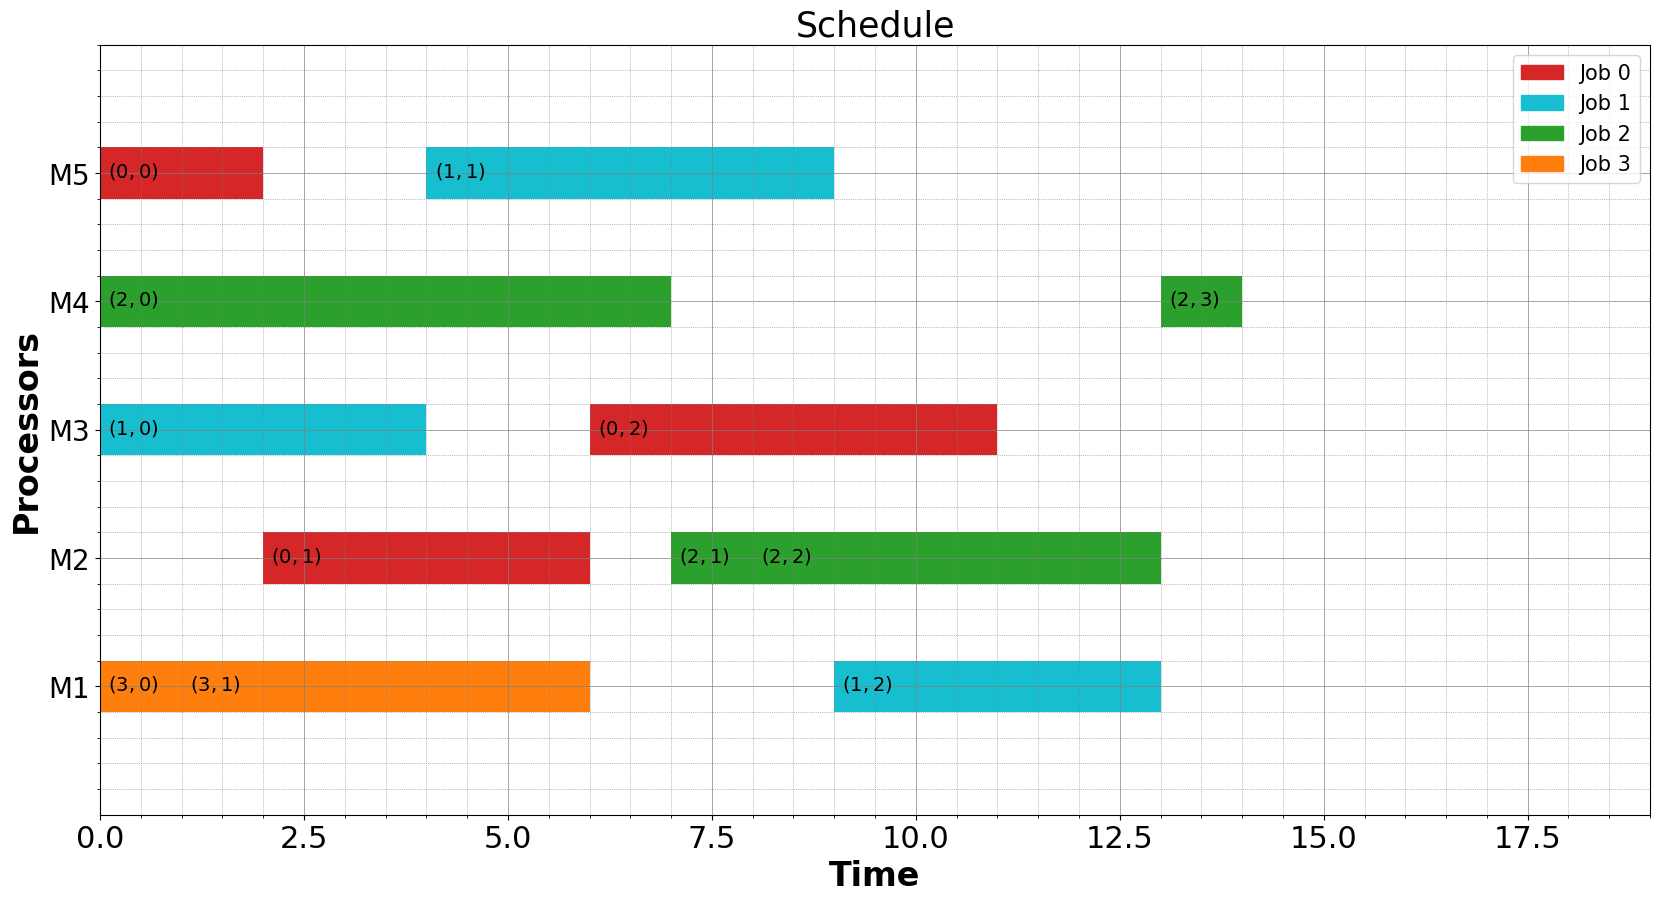

In [6]:
#executer le programme diagram.ipynb qui contient la classe d'affichage des diagrammes
#%run ./utils/diagram.ipynb
from utils import diagram as diag

lambdaC=0.99 # Degradtion threshold of Corrective Maintenance  
lambdaQ=0.8  # Degradation threshold of Quality maintenance
lambdaPM=0.99 # Degradation threshold of Preventive Maintenance
mu=0.001      # reliability degradation rate
instancefilename='Instances/FJSSPinstances/5_Kacem/Kacem1.fjs'
ptimes=FJSInstanceReading(instancefilename)
for i in range(len(ptimes)): print( 'J%i(%i ops):' % (i+1, len(ptimes[i])), ptimes[i])

ProcTime=ptimes

PM_time  = 2
CM_time  = 5
LargVmax = sum([1  for jid,job in enumerate(ProcTime) for opid,op in enumerate(job) if len(op)>1])

maxtimes=[10,30,60,120,180,300]
kmaxes=[int(LargVmax/i) for i in range(1,7) ]
kmaxes.reverse()
kmaxes=list(set(kmaxes))
nbrrestarts=[1,3,5,10]
nbrtests=len(maxtimes)*len(kmaxes)*len(nbrrestarts)
resfich = open("resparametrage.csv", "a")
resfich.write("maxtime;kmax;nbrestarts; cmax")
ntest=0
for maxtime in maxtimes:
    for kmax in kmaxes:
        for nrestarts in nbrrestarts:
            ntest+=1
            print("test %d / %d : maxtime=%d kmax=%d nbrrestarts=%d" % (ntest,nbrtests,maxtime,kmax,nrestarts))
            pngfilename="Results/Figs/res_%d_%d_%d" %(maxtime,kmax,nrestarts)
            #pngfilename2="Fig/_%d_%d_%d" %(maxtime,kmax,nrestarts)
            for i in range(nrestarts):
                initsol    = GenerRandSolFJSSP(ProcTime)
                a0,b0,c0,d0,e0,f0= evaluate(initsol)
                bestsol=initsol
                bestcmax=c0
                #print("kmax=",kmax)
                bestsolVNS = BasicVNS(ProcTime,kmax,maxtime)
                a,b,vnscmax,d,e,f= evaluate(bestsolVNS)
                if vnscmax<bestcmax:
                    bestsol=bestsolVNS
                    bestcmax=vnscmax
            a,b,c,d,e,f= evaluate(bestsol)
            GanttVNS = diag.diagram(a,b,PM_time,mu,c,d,e,f,pngfilename)
            GanttVNS.plotGantt()
            GanttVNS.plotEHF()
            resfich.write("%d ; %d ; %d ; %d" % (maxtime,kmax,nrestarts,c))
resfich.close()

In [ ]:
c="5"
a='hh'+c
print(a)

hh5


In [ ]:
print('********************************************************')
print('init sol=',initsol, "Cmax=",c)
a,b,c,d,e,f= evaluate(bestsolVNS)
print('VNS sol=',bestsolVNS, "Cmax=",c)
print('VNS schedule:')
for id,sc in enumerate(d):
    print("Schedule of M",id+1,":",sc)
for id,ma in enumerate(e):
    print("Maintenance tasks of M",id+1,"=",ma)
for id,ma in enumerate(f):
    print("EHF of M",id+1,"=",ma)

[1, 2, 3, 5, 10]


Schedule= [[], [(1, 0, 0, 0), (0, 1, 0, 0)], [(2, 0, 0, 0), (1, 1, 0, 0), (0, 2, 0, 0)], [(0, 0, 0, 0), (2, 1, 0, 0)], []]
Production scedhuling: [[], [(1, 0, 0, 0), (0, 1, 0, 0)], [(2, 0, 0, 0), (1, 1, 0, 0), (0, 2, 0, 0)], [(0, 0, 0, 0), (2, 1, 0, 0)], []]
Maintenance scedhuling: [[], [], [], [], []]


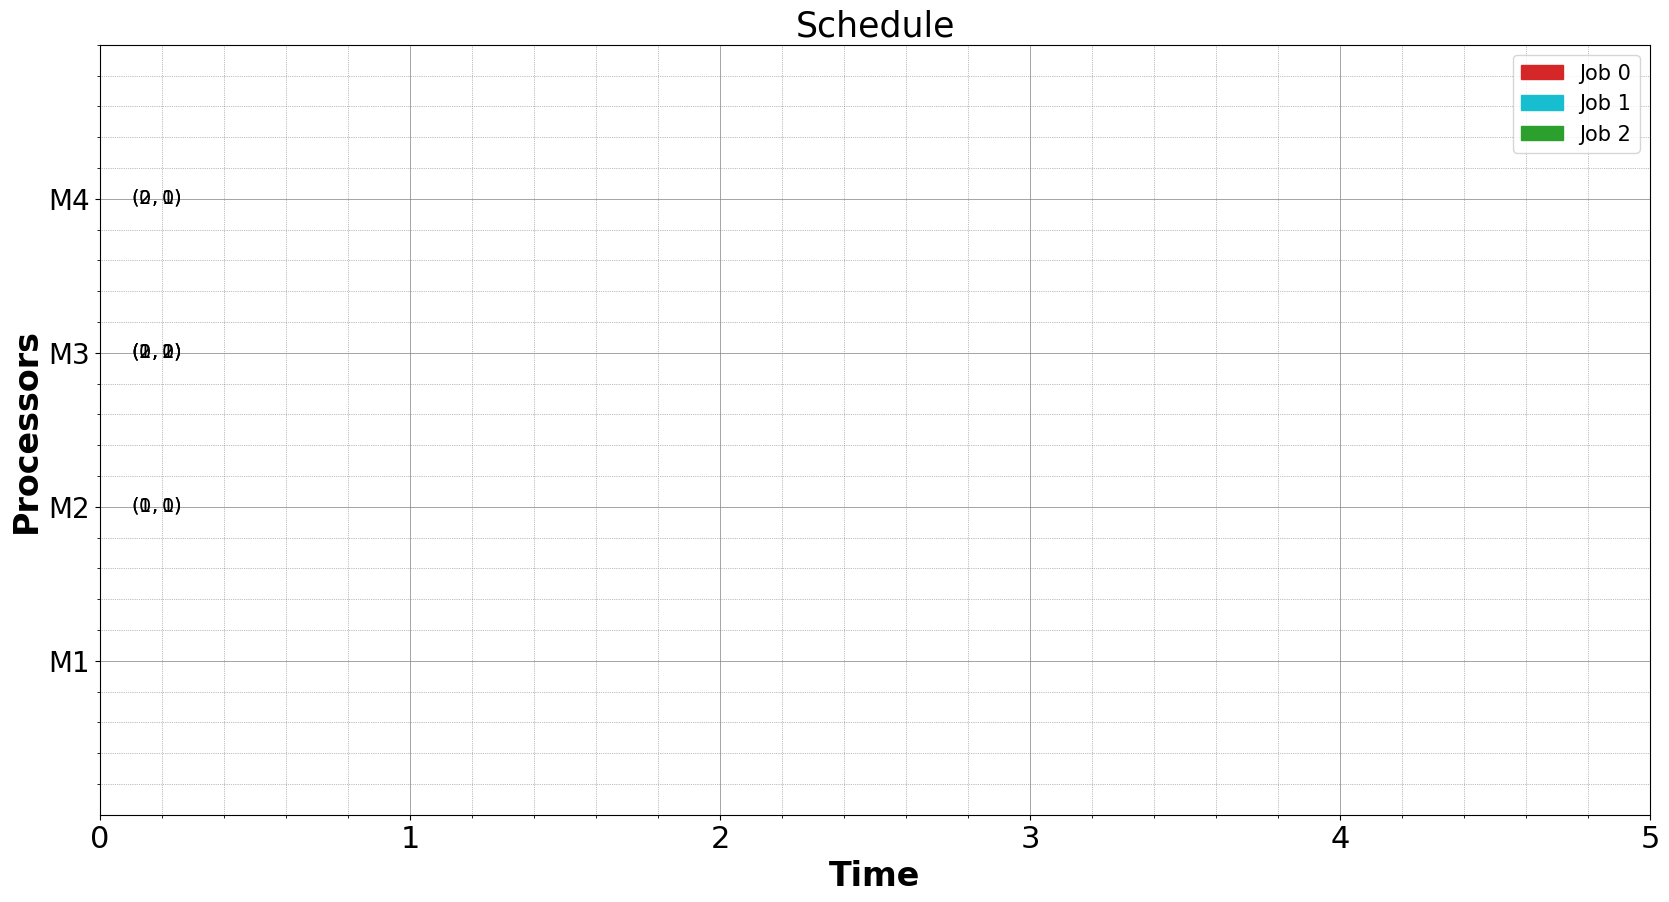

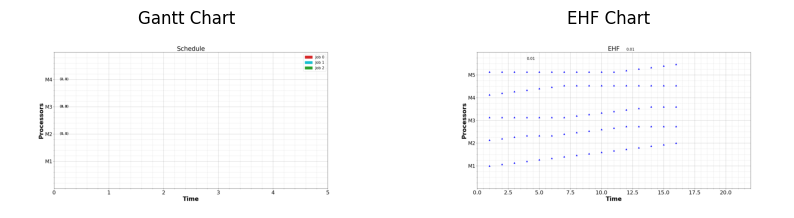

Initial solution:  [(0, 0), (2, 3), (0, 4), (2, 1), (1, 2), (3, 3), (2, 1), (1, 3), (1, 0), (2, 0), (3, 2), (0, 4)]
bestsol RS: [(0, 0), (2, 3), (0, 0), (2, 1), (1, 2), (3, 3), (2, 1), (1, 0), (1, 1), (2, 0), (3, 0), (0, 4)]  bestE= 22 NbrIter= 3
RS sol= [(0, 0), (2, 3), (0, 0), (2, 1), (1, 2), (3, 3), (2, 1), (1, 0), (1, 1), (2, 0), (3, 0), (0, 4)] Cmax= 22
RS schedule:
Schedule of M 1 : [(0, 0, 0, 2), (0, 1, 2, 7), (1, 1, 7, 12), (2, 3, 13, 17), (3, 1, 17, 22)]
Schedule of M 2 : [(2, 1, 7, 8), (2, 2, 8, 13), (1, 2, 13, 18)]
Schedule of M 3 : [(1, 0, 0, 4)]
Schedule of M 4 : [(2, 0, 0, 7), (3, 0, 7, 11)]
Schedule of M 5 : [(0, 2, 7, 12)]
Maintenance tasks of M 1 = []
Maintenance tasks of M 2 = []
Maintenance tasks of M 3 = []
Maintenance tasks of M 4 = []
Maintenance tasks of M 5 = []
EHF of M 1 = 0.021
EHF of M 2 = 0.011
EHF of M 3 = 0.004
EHF of M 4 = 0.011
EHF of M 5 = 0.005


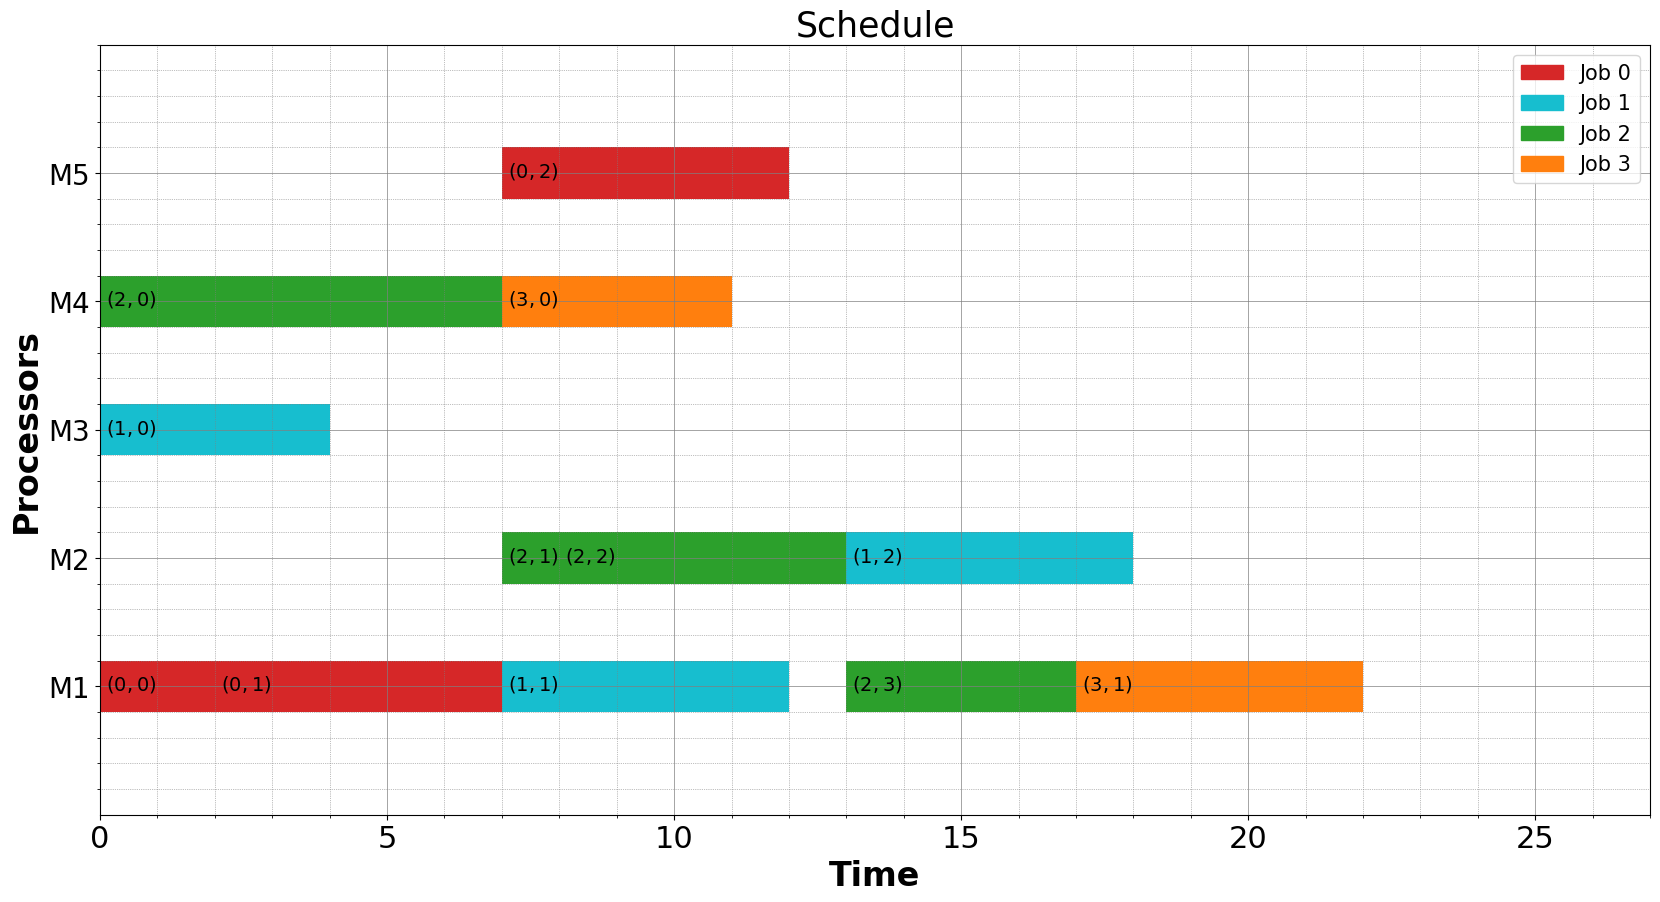

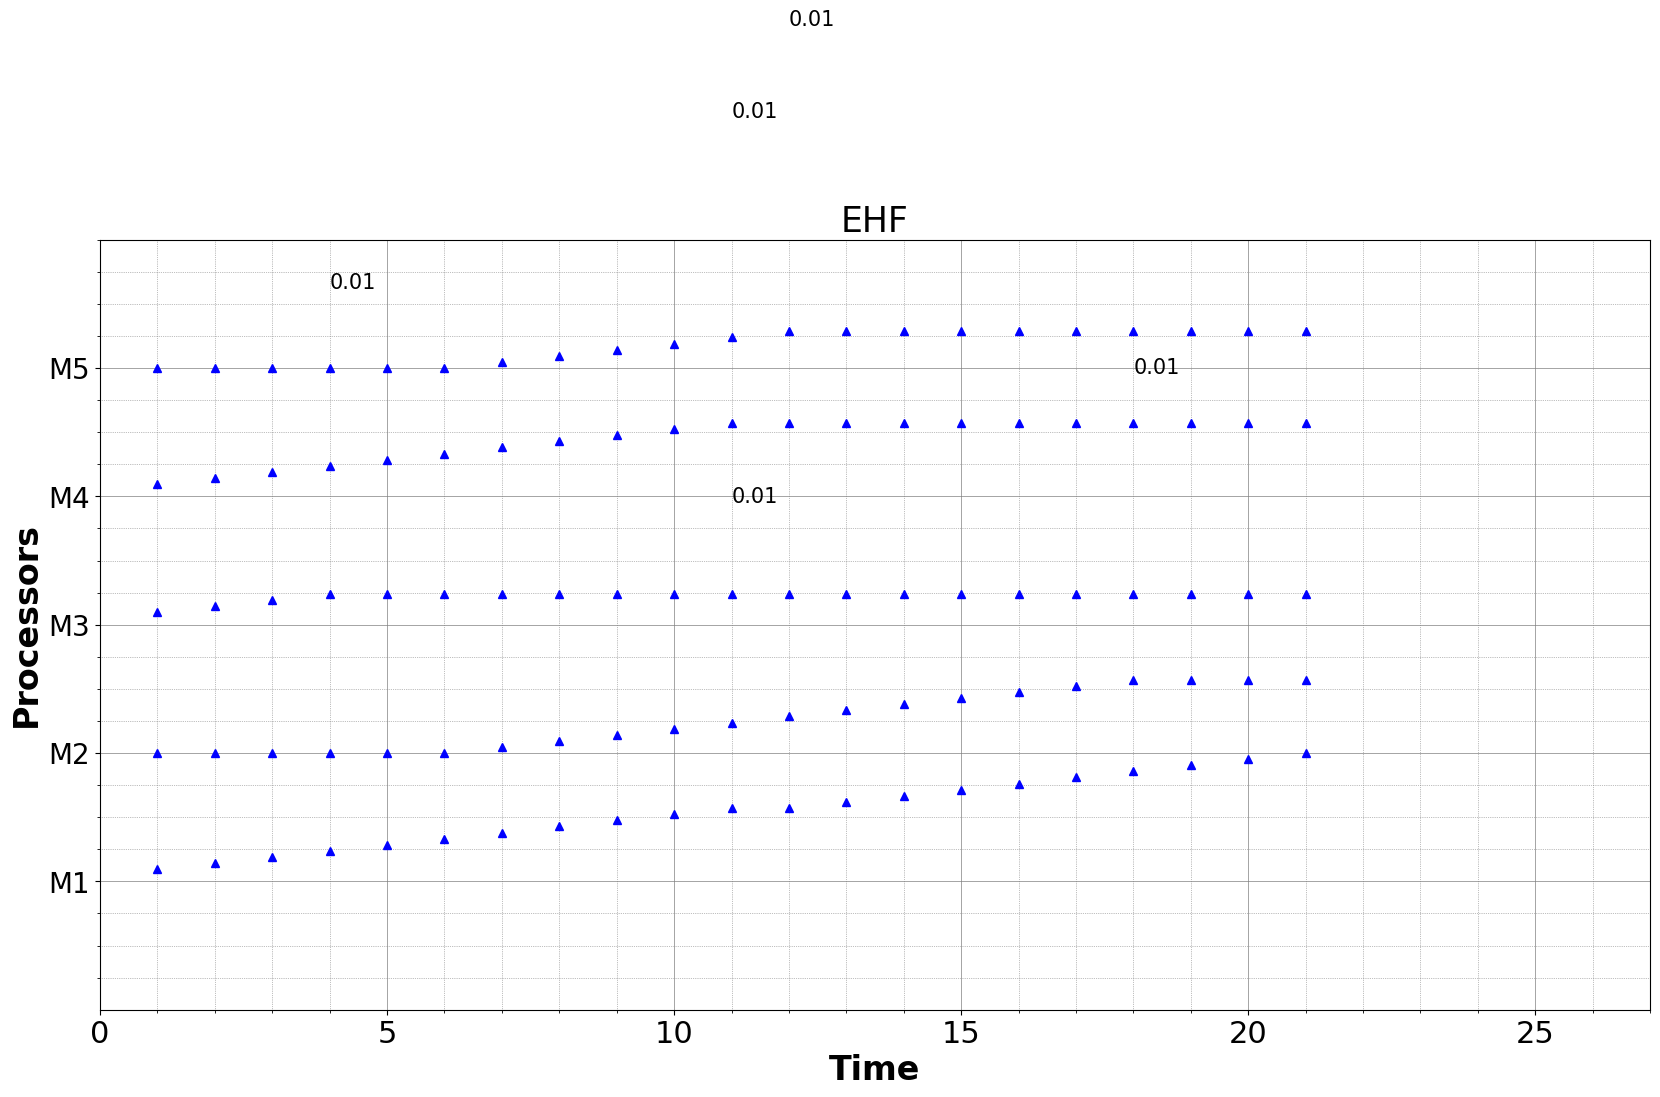

In [ ]:
from RecuitSimule import RS
from RecuitSimule import data

Tinit=50
CoolRate=0.1
Tstop=0.1
IterSize=50
IterMax=100

data_instance = data()
data_instance.ProcTime=ProcTime
RS_instance=RS(initsol,Tinit,CoolRate,Tstop,IterSize,IterMax)
bestsolRS, best_energy, nb_iteration = RS_instance.simulated_annealing(data_instance)


print('bestsol RS:', bestsolRS, ' bestE=', best_energy,'NbrIter=', nb_iteration )
a,b,c,d,e,f=evaluate(bestsolRS)
print('RS sol=',bestsolRS, "Cmax=",c)
print('RS schedule:')
for id,sc in enumerate(d):
    print("Schedule of M",id+1,":",sc)
for id,ma in enumerate(e):
    print("Maintenance tasks of M",id+1,"=",ma)
for id,ma in enumerate(f):
    print("EHF of M",id+1,"=",ma)
GanttRS = diag.diagram(a,b,PM_time,mu,c,d,e,f)
GanttRS.plotGantt()
GanttRS.plotEHF()

In [ ]:
print(ProcTime[0][0][0])

(0, 2)
